# Churn Analysis

#Importing libraries


In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,precision_score,recall_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import plot_model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb
import lime
from lime import lime_tabular
from imblearn.over_sampling import SMOTE

#Loading data

In [136]:
df = pd.read_csv("Churn_treino.csv", sep=";")
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0,1,1,1,10134888,1
1,608,Spain,Female,41,1,8380786,1,0,1,11254258,0
2,502,France,Female,42,8,1596608,3,1,0,11393157,1
3,699,France,Female,39,1,0,2,0,0,9382663,0
4,850,Spain,Female,43,2,12551082,1,1,1,790841,0
5,645,Spain,Male,44,8,11375578,2,1,0,14975671,1
6,822,France,Male,50,7,0,2,1,1,100628,0
7,376,Germany,Female,29,4,11504674,4,1,0,11934688,1
8,501,France,Male,44,4,14205107,2,0,1,749405,0
9,684,France,Male,27,2,13460388,1,1,1,7172573,0


#EDA

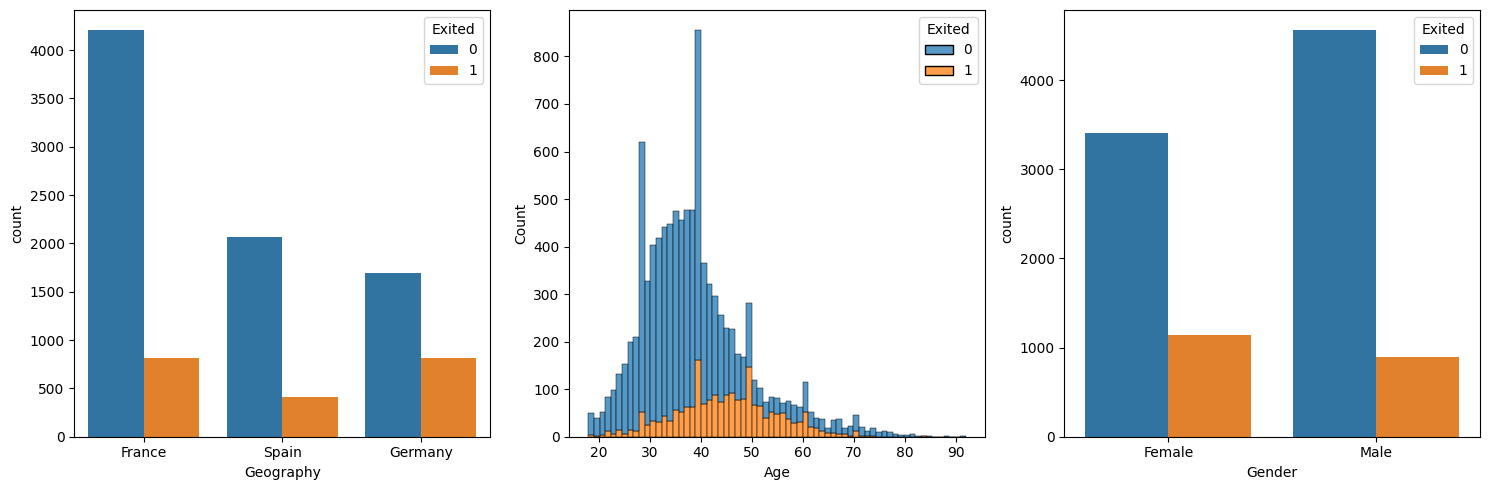

In [137]:
# Distribution of "Exit" (Churn) profile according to Geography, Age, and Gender.
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='Geography', hue='Exited', data=df, ax=ax[0])
sns.histplot(data=df, x='Age', hue='Exited', multiple="stack", ax=ax[1])
sns.countplot(x='Gender', hue='Exited', data=df, ax=ax[2])
plt.tight_layout()
plt.show()

#Data preprocessing

In [138]:
# Defining the predictor variables and the target variable
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [139]:
# Checking for missing values
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [140]:
# Standardizing numerical variables so they don't contribute disproportionately to the model
standarscaler = StandardScaler()
numerical = X.select_dtypes(include=['int64','float64']).columns
X[numerical] = standarscaler.fit_transform(X[numerical])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,France,Female,0.293517,-1.041760,-1.110553,-0.911583,0.646092,0.970243,0.170614
1,-0.440036,Spain,Female,0.198164,-1.387538,0.222782,-0.911583,-1.547768,0.970243,0.353281
2,-1.536794,France,Female,0.293517,1.032908,-0.856542,2.527057,0.646092,-1.030670,0.375948
3,0.501521,France,Female,0.007457,-1.387538,-1.110553,0.807737,-1.547768,-1.030670,0.047859
4,2.063884,Spain,Female,0.388871,-1.041760,0.886252,-0.911583,0.646092,0.970243,-1.354223


In [141]:
# Transforming categorical columns into numerical ones
labelencoder = LabelEncoder()
categorical = X.select_dtypes(include='object').columns
for col in categorical:
  X[col] = labelencoder.fit_transform(X[col])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0,0,0.293517,-1.041760,-1.110553,-0.911583,0.646092,0.970243,0.170614
1,-0.440036,2,0,0.198164,-1.387538,0.222782,-0.911583,-1.547768,0.970243,0.353281
2,-1.536794,0,0,0.293517,1.032908,-0.856542,2.527057,0.646092,-1.030670,0.375948
3,0.501521,0,0,0.007457,-1.387538,-1.110553,0.807737,-1.547768,-1.030670,0.047859
4,2.063884,2,0,0.388871,-1.041760,0.886252,-0.911583,0.646092,0.970243,-1.354223


In [142]:
# Splitting the data into training and test sets, with 70% for training and 30% for testing.
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=0.3, random_state=0)

In [143]:
# Check target variable balance in the training set
print("Target variable balance before oversampling:") # Target variable balance before oversampling:
print(y_treino.value_counts())
print(y_treino.value_counts(normalize=True))

# Apply oversampling with SMOTE on the training set
smote = SMOTE(random_state=0)
X_treino_res, y_treino_res = smote.fit_resample(X_treino, y_treino)

# Check target variable balance after oversampling
print("\nTarget variable balance after oversampling:") # Target variable balance after oversampling:
print(y_treino_res.value_counts())
print(y_treino_res.value_counts(normalize=True))

Target variable balance before oversampling:
Exited
0    5584
1    1416
Name: count, dtype: int64
Exited
0    0.797714
1    0.202286
Name: proportion, dtype: float64

Target variable balance after oversampling:
Exited
1    5584
0    5584
Name: count, dtype: int64
Exited
1    0.5
0    0.5
Name: proportion, dtype: float64


#Neural Networks Model

In [144]:
modelo = Sequential([                     # Create a sequential model (layers stacked in order).
    Input(shape=(X_treino.shape[1],)),    # Define the input shape (number of columns in X_treino).
    Dense(units=64, activation='relu'),   # First dense layer with 64 neurons and ReLU activation.
    Dropout(0.4),                         # Randomly "turn off" 40% of neurons in this layer (regularization).
    Dense(units=32, activation='relu'),   # Second dense layer with 32 neurons and ReLU activation.
    Dropout(0.4),                         # Another 40% dropout to prevent overfitting.
    Dense(units=64, activation='relu'),   # Third dense layer with 64 neurons and ReLU activation.
    Dropout(0.4),                         # Dropout again with a 40% rate.
    Dense(units=1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation (for binary classification).
])

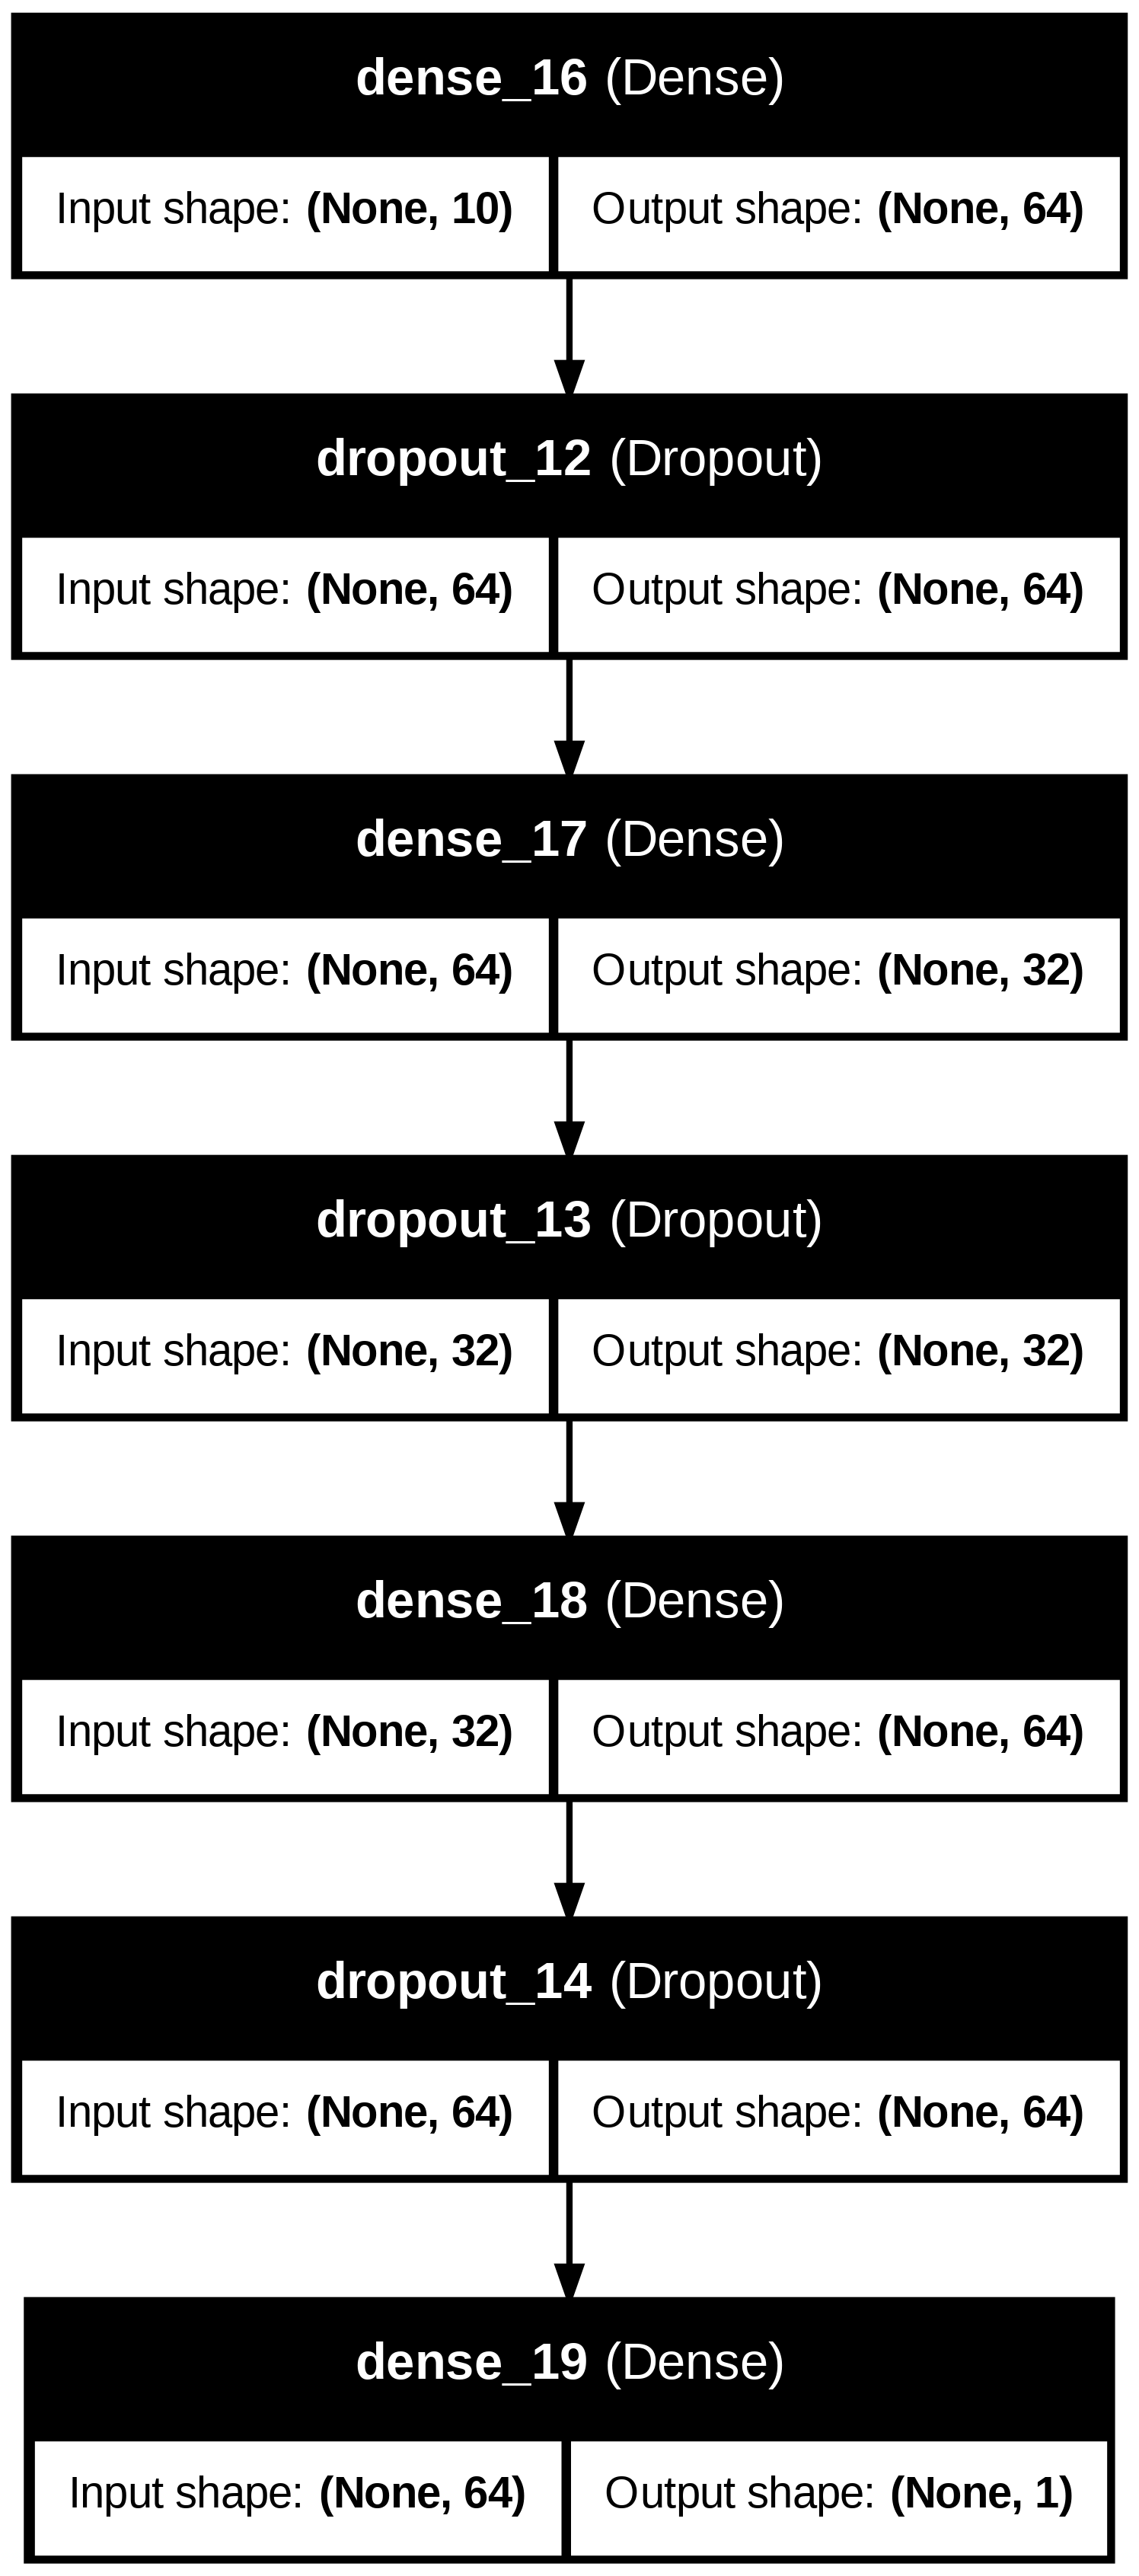

In [145]:
plot_model(modelo, to_file="modelo.png", show_shapes=True, show_layer_names=True, dpi=300)


#Training

In [146]:
# Training the model
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
modelo.fit(X_treino, y_treino, epochs=100, batch_size=32)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7391 - loss: 0.5553
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8008 - loss: 0.4629
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7978 - loss: 0.4594
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8012 - loss: 0.4503
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8205 - loss: 0.4175
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8293 - loss: 0.4195
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8293 - loss: 0.4125
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8319 - loss: 0.3986
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8383 - loss: 0.3959
Epoch 10/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8275 - loss: 0.4093
Epoch 11/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8282 - loss: 0.3998
Epoch 12/100
219/219 ━━━━━━━━━━━━━━━━━━━━

#Predictions

In [147]:
previsoes = modelo.predict(X_teste)
previsoes

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.2206209 ],
       [0.21532704],
       [0.1267058 ],
       ...,
       [0.049801  ],
       [0.10268863],
       [0.613098  ]], dtype=float32)

In [148]:
y_pred = (previsoes > 0.5).astype('int32')  # Convert predictions to 0 or 1: values > 0.5 become 1, otherwise 0
y_pred                                      # Display the binary predicted values (final classes)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int32)

#Metrics

In [149]:
# Dictionary with model metrics

metrics = {
    'Accuracy': accuracy_score(y_teste, y_pred),
    'F1-Score': f1_score(y_teste, y_pred),
    'Precision': precision_score(y_teste, y_pred),
    'Recall': recall_score(y_teste, y_pred)
}
print("Evaluation Metrics")
for metric, value in metrics.items():
  print(f"{metric}: {value}")

Evaluation Metrics
Accuracy: 0.8546666666666667
F1-Score: 0.57421875
Precision: 0.7295285359801489
Recall: 0.47342995169082125


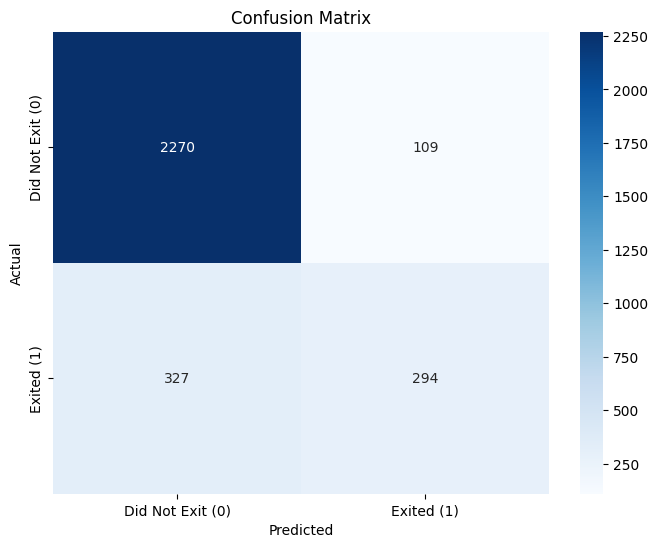

In [150]:
# Creating the confusion matrix
cm = confusion_matrix(y_teste, y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Exit (0)', 'Exited (1)'], yticklabels=['Did Not Exit (0)', 'Exited (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Logistic Regression

In [151]:
# Creating the Logistic Regression model
modelo_logistico = LogisticRegression(random_state=0)

# Training the model with the training data
modelo_logistico.fit(X_treino, y_treino)

# Making predictions with the test data
y_pred_logistico = modelo_logistico.predict(X_teste)

# Calculating metrics for the Logistic Regression model
metrics_logistico = {
    'Accuracy': accuracy_score(y_teste, y_pred_logistico),
    'F1-Score': f1_score(y_teste, y_pred_logistico),
    'Precision': precision_score(y_teste, y_pred_logistico),
    'Recall': recall_score(y_teste, y_pred_logistico)
}

print("\nEvaluation Metrics for Logistic Regression")
for metric, value in metrics_logistico.items():
  print(f"{metric}: {value}")


Evaluation Metrics for Logistic Regression
Accuracy: 0.8033333333333333
F1-Score: 0.26616915422885573
Precision: 0.5846994535519126
Recall: 0.1723027375201288


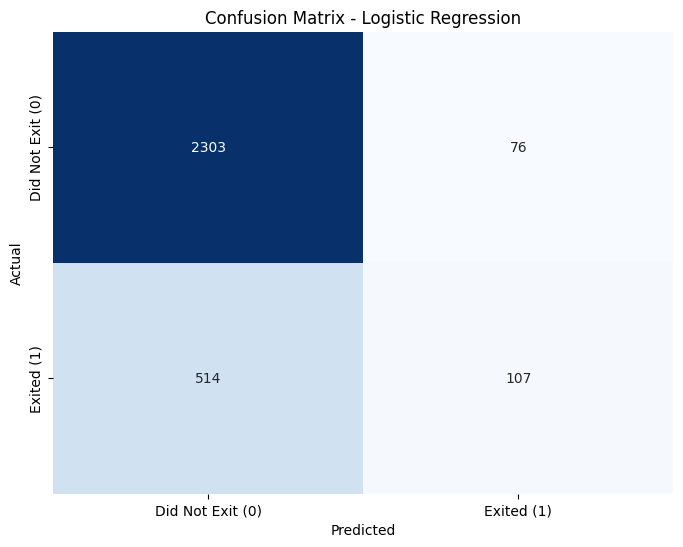

In [152]:
# Generating the confusion matrix for the Logistic Regression model
cm_logistico = confusion_matrix(y_teste, y_pred_logistico)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistico, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Did Not Exit (0)', 'Exited (1)'], yticklabels=['Did Not Exit (0)', 'Exited (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Random Forest

In [153]:
# Creating the Random Forest model
modelo_rf = RandomForestClassifier(random_state=0)

# Training the model with the training data
modelo_rf.fit(X_treino, y_treino)

# Making predictions with the test data
y_pred_rf = modelo_rf.predict(X_teste)

# Calculating metrics for the Random Forest model
metrics_rf = {
    'Accuracy': accuracy_score(y_teste, y_pred_rf),
    'F1-Score': f1_score(y_teste, y_pred_rf),
    'Precision': precision_score(y_teste, y_pred_rf),
    'Recall': recall_score(y_teste, y_pred_rf)
}

print("\nEvaluation Metrics for Random Forest")
for metric, value in metrics_rf.items():
  print(f"{metric}: {value}")


Evaluation Metrics for Random Forest
Accuracy: 0.8616666666666667
F1-Score: 0.5951219512195122
Precision: 0.754950495049505
Recall: 0.49114331723027377


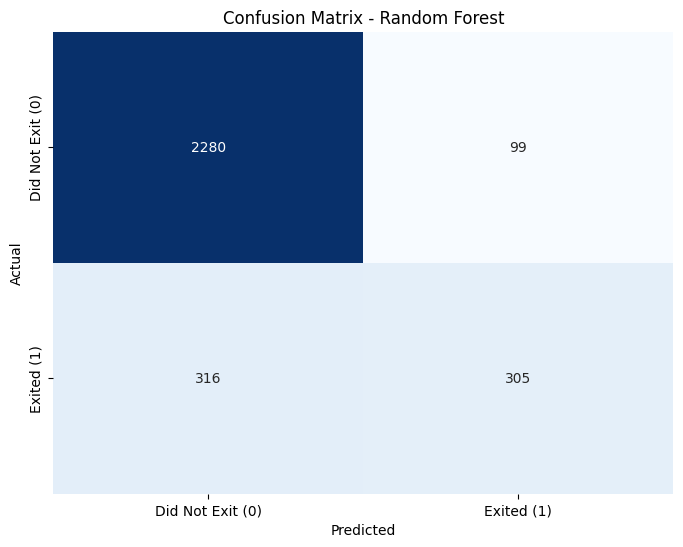

In [154]:
# Generating the confusion matrix for the Random Forest model
cm_rf = confusion_matrix(y_teste, y_pred_rf)
# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Did Not Exit (0)', 'Exited (1)'], yticklabels=['Did Not Exit (0)', 'Exited (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

#Naive Bayes

In [155]:
# Creating the Naive Bayes model (GaussianNB for numerical data)
modelo_nb = GaussianNB()

# Training the model with the training data
modelo_nb.fit(X_treino, y_treino)

# Making predictions with the test data
y_pred_nb = modelo_nb.predict(X_teste)

# Calculating metrics for the Naive Bayes model
metrics_nb = {
    'Accuracy': accuracy_score(y_teste, y_pred_nb),
    'F1-Score': f1_score(y_teste, y_pred_nb),
    'Precision': precision_score(y_teste, y_pred_nb),
    'Recall': recall_score(y_teste, y_pred_nb)
}

print("\nEvaluation Metrics for Naive Bayes")
for metric, value in metrics_nb.items():
  print(f"{metric}: {value}")


Evaluation Metrics for Naive Bayes
Accuracy: 0.822
F1-Score: 0.3657957244655582
Precision: 0.6968325791855203
Recall: 0.24798711755233493


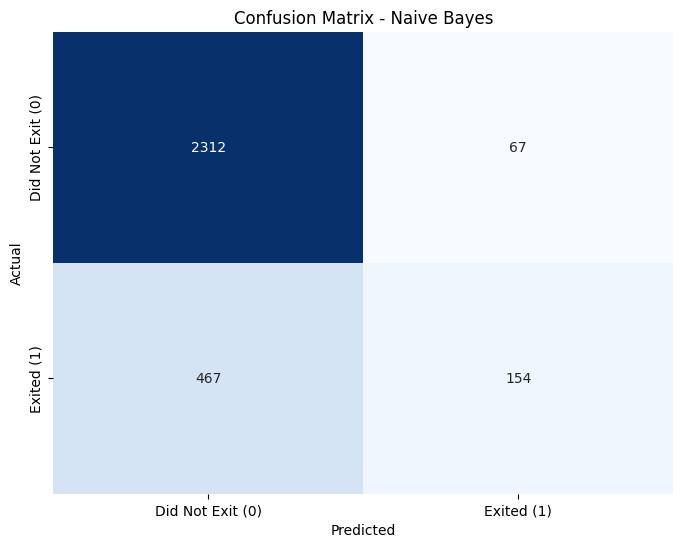

In [156]:
# Generating the confusion matrix for the Naive Bayes model
cm_nb = confusion_matrix(y_teste, y_pred_nb)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Did Not Exit (0)', 'Exited (1)'], yticklabels=['Did Not Exit (0)', 'Exited (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

#SVM

In [157]:
# Creating the SVM (Support Vector Machine) model
modelo_svm = SVC(random_state=0)

# Training the model with the training data
modelo_svm.fit(X_treino, y_treino)

# Making predictions with the test data
y_pred_svm = modelo_svm.predict(X_teste)

# Calculating metrics for the SVM model
metrics_svm = {
    'Accuracy': accuracy_score(y_teste, y_pred_svm),
    'F1-Score': f1_score(y_teste, y_pred_svm),
    'Precision': precision_score(y_teste, y_pred_svm),
    'Recall': recall_score(y_teste, y_pred_svm)
}

print("\nEvaluation Metrics for SVM")
for metric, value in metrics_svm.items():
  print(f"{metric}: {value}")


Evaluation Metrics for SVM
Accuracy: 0.8633333333333333
F1-Score: 0.5591397849462365
Precision: 0.8414239482200647
Recall: 0.41867954911433175


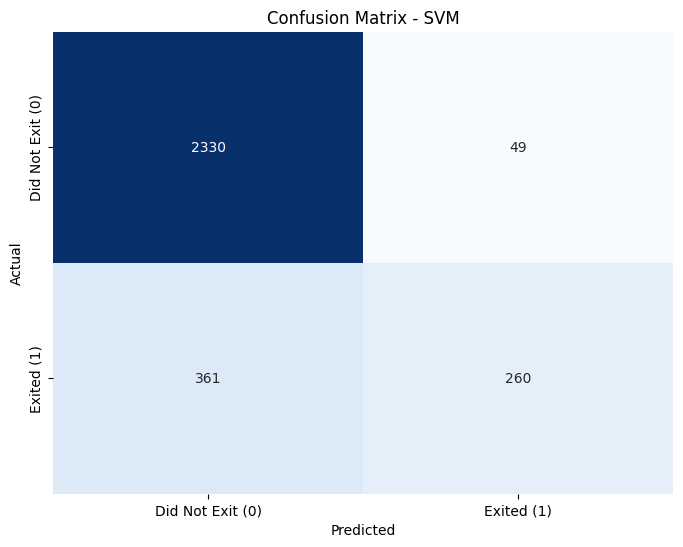

In [158]:
# Generating the confusion matrix for the SVM model
cm_svm = confusion_matrix(y_teste, y_pred_svm)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Did Not Exit (0)', 'Exited (1)'], yticklabels=['Did Not Exit (0)', 'Exited (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

#AdaBoost

In [159]:
# Creating the AdaBoost model
modelo_ada = AdaBoostClassifier(random_state=0)

# Training the model with the training data
modelo_ada.fit(X_treino, y_treino)

# Making predictions with the test data
y_pred_ada = modelo_ada.predict(X_teste)

# Calculating metrics for the AdaBoost model
metrics_ada = {
    'Accuracy': accuracy_score(y_teste, y_pred_ada),
    'F1-Score': f1_score(y_teste, y_pred_ada),
    'Precision': precision_score(y_teste, y_pred_ada),
    'Recall': recall_score(y_teste, y_pred_ada)
}

print("\nEvaluation Metrics for AdaBoost")
for metric, value in metrics_ada.items():
  print(f"{metric}: {value}")


Evaluation Metrics for AdaBoost
Accuracy: 0.856
F1-Score: 0.5877862595419847
Precision: 0.7213114754098361
Recall: 0.49597423510466987


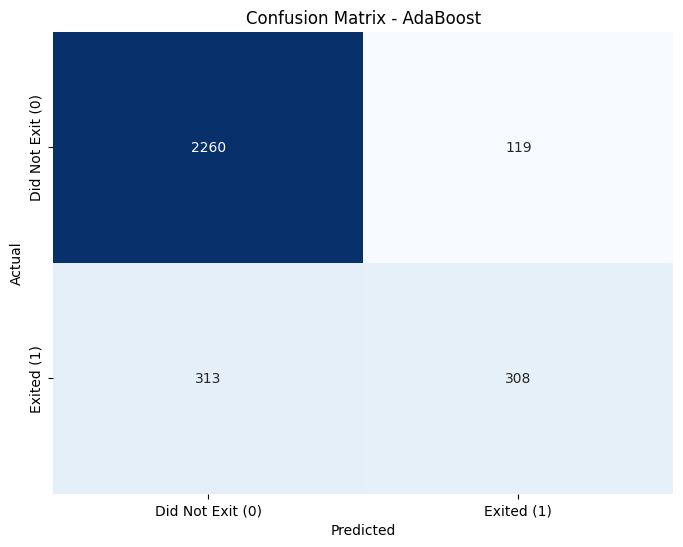

In [160]:
# Generating the confusion matrix for the AdaBoost model
cm_ada = confusion_matrix(y_teste, y_pred_ada)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Did Not Exit (0)', 'Exited (1)'], yticklabels=['Did Not Exit (0)', 'Exited (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AdaBoost')
plt.show()

#XGBoost

In [161]:
# Creating the XGBoost model
modelo_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

# Training the model with the training data
modelo_xgb.fit(X_treino, y_treino)

# Making predictions with the test data
y_pred_xgb = modelo_xgb.predict(X_teste)

# Calculating metrics for the XGBoost model
metrics_xgb = {
    'Accuracy': accuracy_score(y_teste, y_pred_xgb),
    'F1-Score': f1_score(y_teste, y_pred_xgb),
    'Precision': precision_score(y_teste, y_pred_xgb),
    'Recall': recall_score(y_teste, y_pred_xgb)
}

print("\nEvaluation Metrics for XGBoost")
for metric, value in metrics_xgb.items():
  print(f"{metric}: {value}")


Evaluation Metrics for XGBoost
Accuracy: 0.8543333333333333
F1-Score: 0.5949953660797034
Precision: 0.7008733624454149
Recall: 0.5169082125603864


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:21:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


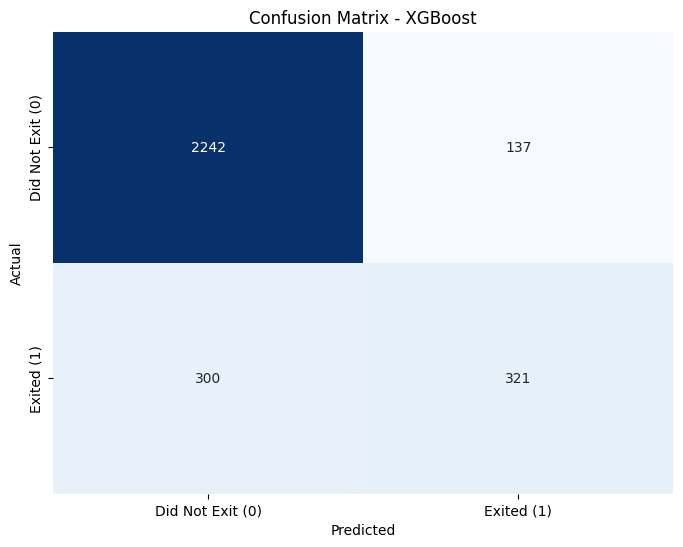

In [162]:
# Generating the confusion matrix for the XGBoost model
cm_xgb = confusion_matrix(y_teste, y_pred_xgb)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Did Not Exit (0)', 'Exited (1)'], yticklabels=['Did Not Exit (0)', 'Exited (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

#KNN

In [163]:
# Creating the KNN model
# NOTE: we can experiment with different values for n_neighbors (the number of neighbors)
modelo_knn = KNeighborsClassifier(n_neighbors=5)

# Training the model with the training data
modelo_knn.fit(X_treino, y_treino)

# Making predictions with the test data
y_pred_knn = modelo_knn.predict(X_teste)

# Calculating metrics for the KNN model
metrics_knn = {
    'Accuracy': accuracy_score(y_teste, y_pred_knn),
    'F1-Score': f1_score(y_teste, y_pred_knn),
    'Precision': precision_score(y_teste, y_pred_knn),
    'Recall': recall_score(y_teste, y_pred_knn)
}

print("\nEvaluation Metrics for KNN")
for metric, value in metrics_knn.items():
  print(f"{metric}: {value}")


Evaluation Metrics for KNN
Accuracy: 0.8233333333333334
F1-Score: 0.482421875
Precision: 0.6129032258064516
Recall: 0.3977455716586151


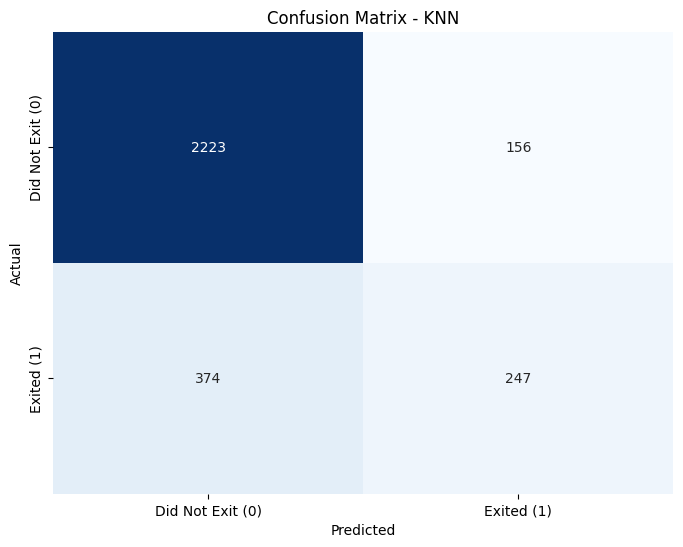

In [164]:
# Generating the confusion matrix for the KNN model
cm_knn = confusion_matrix(y_teste, y_pred_knn)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Did Not Exit (0)', 'Exited (1)'], yticklabels=['Did Not Exit (0)', 'Exited (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

#LightGBM

In [165]:
# Creating the LightGBM model
modelo_lgbm = lgb.LGBMClassifier(random_state=0)

# Training the model with the training data
modelo_lgbm.fit(X_treino, y_treino)

# Making predictions with the test data
y_pred_lgbm = modelo_lgbm.predict(X_teste)

# Calculating metrics for the LightGBM model
metrics_lgbm = {
    'Accuracy': accuracy_score(y_teste, y_pred_lgbm),
    'F1-Score': f1_score(y_teste, y_pred_lgbm),
    'Precision': precision_score(y_teste, y_pred_lgbm),
    'Recall': recall_score(y_teste, y_pred_lgbm)
}

print("\nEvaluation Metrics for LightGBM")
for metric, value in metrics_lgbm.items():
  print(f"{metric}: {value}")

[LightGBM] [Info] Number of positive: 1416, number of negative: 5584
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202286 -> initscore=-1.372069
[LightGBM] [Info] Start training from score -1.372069

Evaluation Metrics for LightGBM
Accuracy: 0.8603333333333333
F1-Score: 0.6087768440709617
Precision: 0.7244444444444444
Recall: 0.5249597423510467


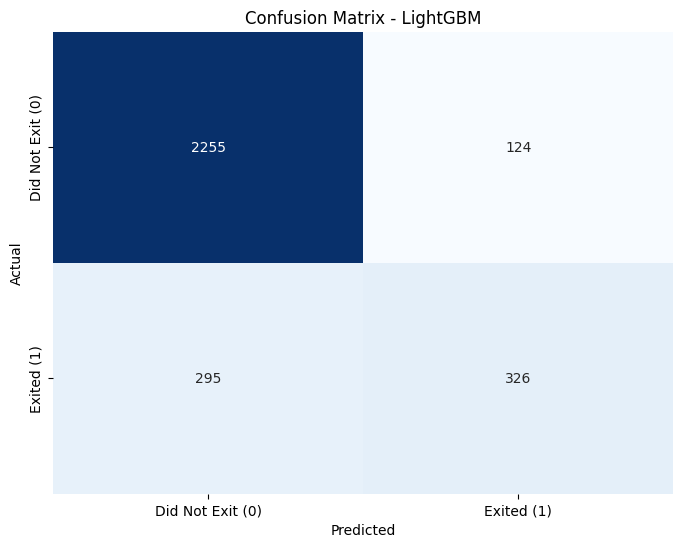

In [166]:
# Generating the confusion matrix for the LightGBM model
cm_lgbm = confusion_matrix(y_teste, y_pred_lgbm)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Did Not Exit (0)', 'Exited (1)'], yticklabels=['Did Not Exit (0)', 'Exited (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM')
plt.show()

#Metrics comparison table for the models

In [167]:
# Grouping the metrics into a DataFrame
metricas_agrupadas = pd.DataFrame({
    'Neural Network': metrics,
    'Logistic Regression': metrics_logistico,
    'Random Forest': metrics_rf,
    'Naive Bayes': metrics_nb,
    'SVM': metrics_svm,
    'AdaBoost': metrics_ada,
    'XGBoost': metrics_xgb,
    'KNN': metrics_knn,
    'LightGBM': metrics_lgbm
})

print("\nComparative Table of Model Metrics:")
metricas_agrupadas


Comparative Table of Model Metrics:


,Neural Network,Logistic Regression,Random Forest,Naive Bayes,SVM,AdaBoost,XGBoost,KNN,LightGBM
Accuracy,0.854667,0.803333,0.861667,0.822000,0.863333,0.856000,0.854333,0.823333,0.860333
F1-Score,0.574219,0.266169,0.595122,0.365796,0.559140,0.587786,0.594995,0.482422,0.608777
Precision,0.729529,0.584699,0.754950,0.696833,0.841424,0.721311,0.700873,0.612903,0.724444
Recall,0.473430,0.172303,0.491143,0.247987,0.418680,0.495974,0.516908,0.397746,0.524960


#Explainability of the best model using LIME


In [168]:
# LIME
# Creating the LIME explainer
# We pass the model we want to explain, the training data, and the column names
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_treino),
    feature_names=X_treino.columns.tolist(),
    class_names=['Did Not Exit', 'Exited'],
    mode='classification'
)

# Choose an instance to explain (e.g., the first instance from the test set)
instance_idx = 0
instance = X_teste.iloc[instance_idx]

# Getting the explanation for the chosen instance
explanation = explainer.explain_instance(
    data_row=instance,
    predict_fn=modelo_lgbm.predict_proba,
    num_features=len(X_teste.columns) # Number of features to show in the explanation
)

# Visualizing the explanation
print(f"\nLIME Explanation for instance {instance_idx}:")
explanation.show_in_notebook(show_table=True, show_all=False)


LIME Explanation for instance 0:


/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.12/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

#Financial Impact of the model

In [169]:
# Assuming a hypothetical average revenue per customer value (in R$)
receita_media_por_cliente = 100

# Getting the values from the LightGBM confusion matrix
# cm_lgbm[0, 0] is True Negative (TN): Customers who did not churn and were predicted as not churning
# cm_lgbm[0, 1] is False Positive (FP): Customers who did not churn and were predicted as churning
# cm_lgbm[1, 0] is False Negative (FN): Customers who churned and were predicted as not churning
# cm_lgbm[1, 1] is True Positive (TP): Customers who churned and were predicted as churning

tn_lgbm = cm_lgbm[0, 0]
fp_lgbm = cm_lgbm[0, 1]
fn_lgbm = cm_lgbm[1, 0]
tp_lgbm = cm_lgbm[1, 1]

# Calculating the number of churners the model correctly identified (True Positives)
churners_identificados_lgbm = tp_lgbm

# Calculating the potential savings: True Positives * Average Revenue per Customer
# This is a simplified estimate, as it assumes all TP could be retained
economia_potencial_lgbm = churners_identificados_lgbm * receita_media_por_cliente

print(f"Potential Churn Savings with LightGBM (assuming retention of all TP): R${economia_potencial_lgbm:.2f}")

Potential Churn Savings with LightGBM (assuming retention of all TP): R$32600.00
